In [1]:
#import all the needed libraries

import pandas as pd
import numpy as np
import csv
import re
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns

#Language Processing

from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
# For model training and hyper parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.svm import LinearSVC, SVC

In [2]:
dev_file = r"development.csv"
eval_file = r"evaluation.csv"

In [3]:
df_dev = pd.read_csv(dev_file, delimiter=',')
df_eva = pd.read_csv(eval_file, delimiter=',')

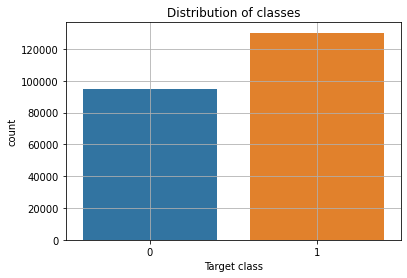

In [4]:
#Class distibution
bar_plot = sns.countplot(x=df_dev['sentiment'])
plt.title("Distribution of classes")
plt.xlabel("Target class")
plt.grid()

In [5]:
df_dev.head()

,sentiment,ids,date,flag,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...


In [6]:
# One hot encoder stores data in sparse format
enc = OneHotEncoder()
enc.fit(np.array(df_dev['user']).reshape(-1,1))


OneHotEncoder()

In [7]:
G=enc.transform(np.array(df_dev['user']).reshape(-1,1))
G2=enc.transform(np.array(df_eva['user']).reshape(-1,1))


In [8]:
features=enc.get_feature_names_out()
len(features)

10647

In [9]:
# alphabets ony, lower case, stemming, stop_words
ps = PorterStemmer()
def pre_processor(doc):
    doc = re.sub('[^a-zA-Z]'," ",doc)
    doc = doc.lower()
    words = doc.split()
    words = [ps.stem(word) for word in words]
    words = " ".join(words)
    return words

In [10]:
# Conversion of text into tfIdf form
vectorizer = TfidfVectorizer(preprocessor = pre_processor,stop_words='english',max_features=1000);
text = vectorizer.fit_transform(df_dev['text'])

/Users/aliabbas/Documents/Myproject/myenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv']

In [11]:
text2=vectorizer.transform(df_eva['text'])

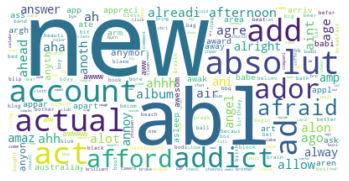

In [12]:
words=np.array(vectorizer.get_feature_names_out())
words = " ".join(words)
wordcloud = WordCloud(background_color="white").generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png")

In [13]:
#Class label y
y=df_dev['sentiment']

In [14]:
# Combining both the preprocessed sparse matrices of tfidf and onehotencoding 
H = hstack([G,text])
H2 = hstack([G2,text2])
print(H2.shape,H.shape)

(74999, 11647) (224994, 11647)


In [15]:
#splitting the dev dataset only
X_train, X_test, y_train, y_test = train_test_split( H,y , test_size=0.3,shuffle=True)

In [66]:


#Baseline Score
model =RandomForestClassifier()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
f1= f1_score(y_predicted,y_test)
f1

0.7934602597467283

In [16]:
Lsvm4 = LinearSVC(C=10)
Lsvm4.fit(X_train, y_train)
y_predicted=Lsvm4.predict(X_test)
f1= f1_score(y_predicted,y_test)
f1

0.8255219482710857

In [153]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
f1= f1_score(y_predicted,y_test)
f1

0.5839159067882472

In [98]:
id=np.arange(0,len(df_eva))

In [99]:
res=Lsvm4.predict(H2)

In [100]:
res

array([1, 1, 0, ..., 0, 0, 1])

In [101]:
df = pd.DataFrame (data = {"Predicted":res})
df.to_csv('y_predict',index_label = "Id")

In [102]:
df

,Predicted
0,1
1,1
2,0
3,0
4,1
...,...
74994,1
74995,1
74996,0
74997,0
